<a href="https://colab.research.google.com/github/Joy0128/PracticalMidterm/blob/main/Moreno_Practical_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#data pre-processing

*importing the libraries*

In [ ]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC





*import the data set*

In [ ]:
#https:'//drive.google.com/file/d/1B3IdBV4UuoN_UiP0vVkz1-BlF7njzMV3/view?usp=sharing'
file_id = '1B3IdBV4UuoN_UiP0vVkz1-BlF7njzMV3'
link = f'https://drive.google.com/uc?id={file_id}'
data_diabetes = pd.read_csv(link)
data_diabetes.head


<bound method NDFrame.head of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.

In [ ]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# Check for null values in dataset
data_diabetes.isnull().sum()
#As you can see we have missin value in the feild of ("Mortgage","Personal Loan", "Securities Account")

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
data_diabetes_encoded = pd.get_dummies(data_diabetes, columns=['smoking_history', 'gender'])

# Display the updated DataFrame
data_diabetes_encoded.head()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0,1,0,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0,1,0,0
2,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0,0,1,0


#heatmap


<ipython-input-8-74680ed2ccd7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_diabetes.corr()


                          age  hypertension  heart_disease       bmi  \
age                  1.000000      0.251171       0.233354  0.337396   
hypertension         0.251171      1.000000       0.121262  0.147666   
heart_disease        0.233354      0.121262       1.000000  0.061198   
bmi                  0.337396      0.147666       0.061198  1.000000   
HbA1c_level          0.101354      0.080939       0.067589  0.082997   
blood_glucose_level  0.110672      0.084429       0.070066  0.091261   
diabetes             0.258008      0.197823       0.171727  0.214357   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.101354             0.110672  0.258008  
hypertension            0.080939             0.084429  0.197823  
heart_disease           0.067589             0.070066  0.171727  
bmi                     0.082997             0.091261  0.214357  
HbA1c_level             1.000000             0.166733  0.400660  
blood_glucose_level     0.1

<Axes: >

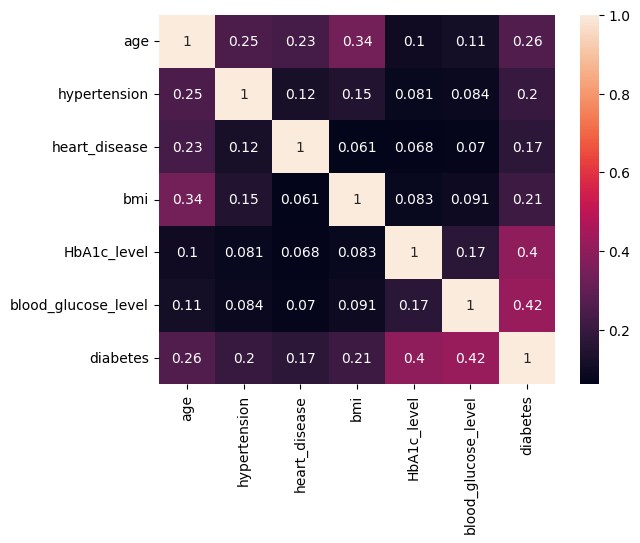

In [ ]:
corr = data_diabetes.corr()
print(corr)
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, annot = True)


#separate the class 0 and class 1

In [ ]:
z_class = data_diabetes[data_diabetes.diabetes==0]
z_class.shape

(91500, 9)

In [ ]:
o_class = data_diabetes[data_diabetes.diabetes==1]
o_class.shape

(8500, 9)

**scaling** the data


In [ ]:
# Scaling the data using Standard Scaler
scaler = StandardScaler()
scaled = scaler.fit(data_diabetes_encoded.drop('diabetes',axis=1)).transform(data_diabetes_encoded.drop('diabetes',axis=1))
df_scaled = pd.DataFrame(scaled, columns=data_diabetes_encoded.columns[:-1])
df_scaled.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male
0,1.692704,-0.284439,4.936379,-0.321056,1.001706,0.047704,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512,0.841358,-0.841046,-0.013418
1,0.538006,-0.284439,-0.202578,-0.000116,1.001706,-1.426210,1.338674,-0.319946,-0.20423,-0.321198,-0.735332,-0.262512,0.841358,-0.841046,-0.013418
2,-0.616691,-0.284439,-0.202578,-0.000116,0.161108,0.489878,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512,-1.188554,1.188995,-0.013418
3,-0.261399,-0.284439,-0.202578,-0.583232,-0.492690,0.416183,-0.747008,3.125524,-0.20423,-0.321198,-0.735332,-0.262512,0.841358,-0.841046,-0.013418
4,1.515058,3.515687,4.936379,-1.081970,-0.679490,0.416183,-0.747008,3.125524,-0.20423,-0.321198,-0.735332,-0.262512,-1.188554,1.188995,-0.013418


# Splitting the columns in to dependent variable (x) and independent variable (y).

In [ ]:
x = df_scaled
y = data_diabetes_encoded['diabetes']
x,y.head()

(            age  hypertension  heart_disease       bmi  HbA1c_level  \
 0      1.692704     -0.284439       4.936379 -0.321056     1.001706   
 1      0.538006     -0.284439      -0.202578 -0.000116     1.001706   
 2     -0.616691     -0.284439      -0.202578 -0.000116     0.161108   
 3     -0.261399     -0.284439      -0.202578 -0.583232    -0.492690   
 4      1.515058      3.515687       4.936379 -1.081970    -0.679490   
 ...         ...           ...            ...       ...          ...   
 99995  1.692704     -0.284439      -0.202578 -0.000116     0.628107   
 99996 -1.771388     -0.284439      -0.202578 -1.499343     0.908306   
 99997  1.070944     -0.284439      -0.202578  0.076729     0.161108   
 99998 -0.794336     -0.284439      -0.202578  1.220361    -1.426688   
 99999  0.671241     -0.284439      -0.202578 -0.736922     1.001706   
 
        blood_glucose_level  diabetes  smoking_history_No Info  \
 0                 0.047704 -0.747008                -0.319946   
 1

In [ ]:
x

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male
0,1.692704,-0.284439,4.936379,-0.321056,1.001706,0.047704,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512,0.841358,-0.841046,-0.013418
1,0.538006,-0.284439,-0.202578,-0.000116,1.001706,-1.426210,1.338674,-0.319946,-0.20423,-0.321198,-0.735332,-0.262512,0.841358,-0.841046,-0.013418
2,-0.616691,-0.284439,-0.202578,-0.000116,0.161108,0.489878,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512,-1.188554,1.188995,-0.013418
3,-0.261399,-0.284439,-0.202578,-0.583232,-0.492690,0.416183,-0.747008,3.125524,-0.20423,-0.321198,-0.735332,-0.262512,0.841358,-0.841046,-0.013418
4,1.515058,3.515687,4.936379,-1.081970,-0.679490,0.416183,-0.747008,3.125524,-0.20423,-0.321198,-0.735332,-0.262512,-1.188554,1.188995,-0.013418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.692704,-0.284439,-0.202578,-0.000116,0.628107,-1.180558,1.338674,-0.319946,-0.20423,-0.321198,-0.735332,-0.262512,0.841358,-0.841046,-0.013418
99996,-1.771388,-0.284439,-0.202578,-1.499343,0.908306,-0.934905,1.338674,-0.319946,-0.20423,-0.321198,-0.735332,-0.262512,0.841358,-0.841046,-0.013418
99997,1.070944,-0.284439,-0.202578,0.076729,0.161108,0.416183,-0.747008,-0.319946,-0.20423,3.113342,-0.735332,-0.262512,-1.188554,1.188995,-0.013418
99998,-0.794336,-0.284439,-0.202578,1.220361,-1.426688,-0.934905,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512,0.841358,-0.841046,-0.013418


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

#SVM


# Split data in to train and test


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.86      0.65      0.74      1703

    accuracy                           0.96     20000
   macro avg       0.91      0.82      0.86     20000
weighted avg       0.96      0.96      0.96     20000

Confusion Matrix:
[[18114   183]
 [  601  1102]]


# Apply SVM Model

In [ ]:
model = SVC()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.963


# Confusion Matrix

<Axes: >

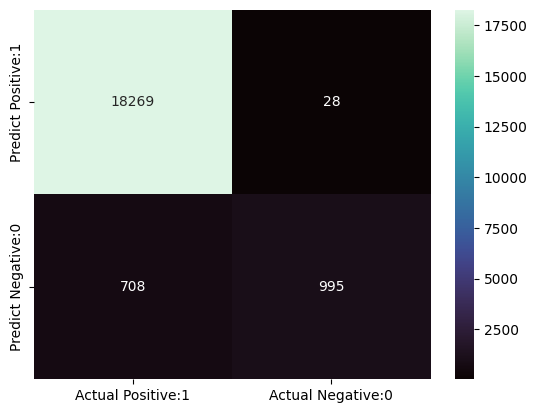

In [ ]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18297
           1       0.97      0.58      0.73      1703

    accuracy                           0.96     20000
   macro avg       0.97      0.79      0.86     20000
weighted avg       0.96      0.96      0.96     20000



Classification Report Summary:

**Precision:** Measures accuracy of positive predictions (0.74 for class 1)

**Recall:** Measures how many actual positives were predicted (0.99 for class 1).

**F1-score:** Harmonic mean of precision and recall (0.85 for class 1).

**Accuracy**: Overall model accuracy (0.75).

**Macro Avg:** Average of metrics, treating classes equally (0.83, 0.58, 0.56).

**Weighted Avg:** Weighted average considering class support (0.79, 0.75, 0.68).

**Interpretation:** The model performs well at capturing actual positive cases but has room for improvement in class 0 predictions

#saving the model

In [ ]:
# save the model to disk
import pickle
pickle.dump(model, open('model_practical.pkl','wb'))